In [70]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_features=4,n_samples=10000,centers=5,random_state=4)

In [71]:
print(X)
print(y)

[[-9.9568945  -1.69238453 -8.50173577  9.98535099]
 [ 9.70119875 -0.41208063 11.04701062  4.46176987]
 [ 7.20844797 10.84334102 -5.88220858  3.25329073]
 ...
 [-4.85923856  0.24876216  7.64817476 -5.18426831]
 [ 4.42345395 -4.26375001 10.88874052 -9.06074702]
 [-3.43457632 -1.75453958  4.59615015 -8.34359224]]
[4 0 3 ... 2 1 2]


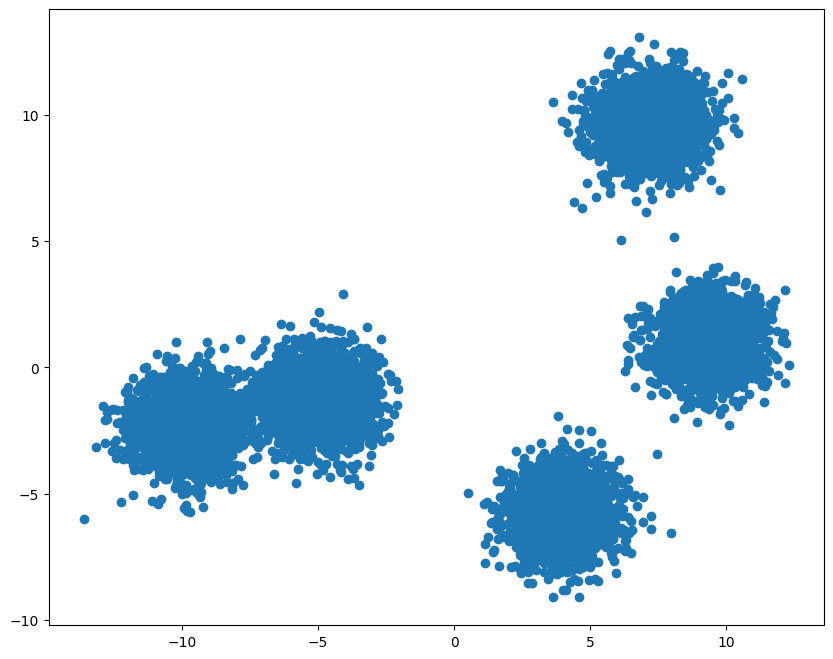

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1])

In [73]:
# converting array into data frame required for Seaborn as Seaborn only accepts dataframe.
import pandas as pd
df_x=pd.DataFrame(X)
df_y=pd.DataFrame(y)

'Palette name\tDescription\n"deep"\tDefault Seaborn color palette\n"muted"\tSofter colors\n"bright"\tVivid colors\n"pastel"\tLight pastel shades\n"dark"\tDarker tones\n"colorblind"\tColorblind-friendly palette\n"coolwarm"\tGood for diverging numerical values\n"viridis"\tPerceptually uniform colormap (great for numerical hue)'

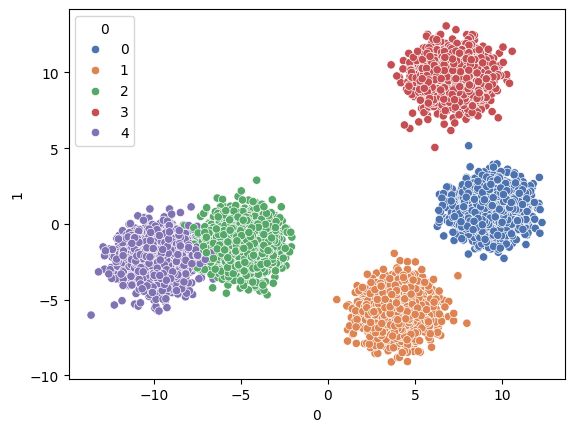

In [74]:
#pip install seaborn
import seaborn as sns
sns.scatterplot(data=df_x,x=df_x[0],y=df_x[1],hue=df_y[0],palette="deep")

"""Palette name	Description
"deep"	Default Seaborn color palette
"muted"	Softer colors
"bright"	Vivid colors
"pastel"	Light pastel shades
"dark"	Darker tones
"colorblind"	Colorblind-friendly palette
"coolwarm"	Good for diverging numerical values
"viridis"	Perceptually uniform colormap (great for numerical hue)"""

In [86]:
#KMeans clustering
from sklearn.cluster import KMeans
KM=KMeans(n_clusters=5)
KM.fit(X)
print(KM.cluster_centers_) # gives cluster centers
print(KM.labels_) # gives cluster labels

[[-4.93734397 -1.28889958  5.60182339 -6.07490455]
 [-9.82018873 -2.30857948 -9.09449889  9.14890087]
 [ 7.27535176  9.65061321 -6.69880822  1.91694799]
 [ 9.346509    0.95536374  9.44608633  4.30939918]
 [ 3.96812566 -5.70247848  9.51046038 -9.85996731]]
[1 3 2 ... 0 4 0]


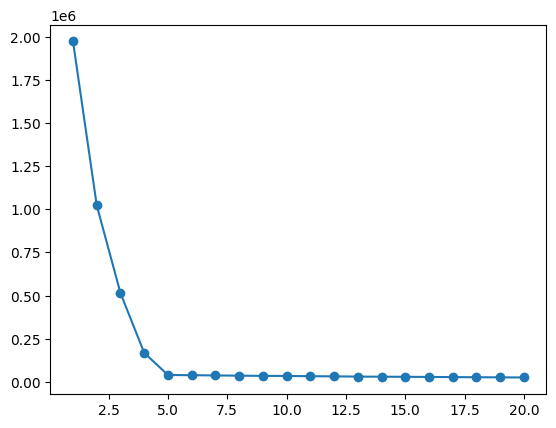

In [88]:
#How many clusters
wcss=[]
for i in range(1,21):
    KMs=KMeans(n_clusters=i)
    KMs.fit(X)
    wcss.append(KMs.inertia_) # inertia is wcss

plt.plot(range(1,21),wcss,marker='o')

In [89]:
df_y_new = pd.DataFrame(KM.labels_)
print(df_y_new)

      0
0     1
1     3
2     2
3     0
4     2
...  ..
9995  1
9996  1
9997  0
9998  4
9999  0

[10000 rows x 1 columns]


In [90]:
df_combined=pd.concat([df_y,df_y_new],axis=1)
df_combined

,0,0
0,4,1
1,0,3
2,3,2
3,2,0
4,3,2
...,...,...
9995,4,1
9996,4,1
9997,2,0
9998,1,4


[]

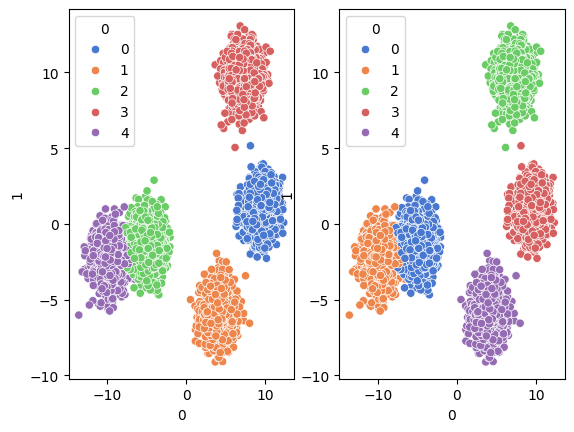

In [91]:
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_x,x=df_x[0],y=df_x[1],hue=df_y[0],palette="muted")
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_x,x=df_x[0],y=df_x[1],hue=df_y_new[0],palette="muted")
plt.plot()

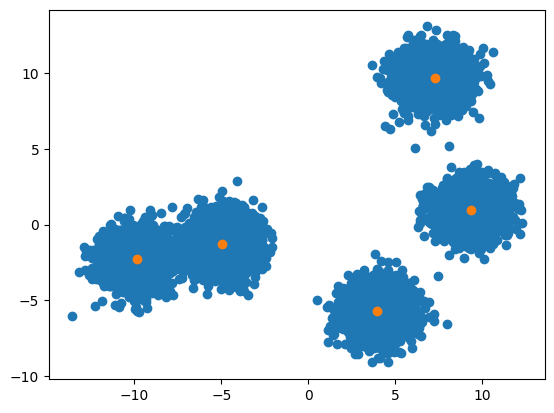

In [92]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(KM.cluster_centers_[:,0],KM.cluster_centers_[:,1])

In [ ]:
#fit_predict - trains the model and gives the class category as well. fit() is for traning and fit_predict is for new data point
KM.fit_predict(X)
y_means=KM.fit_predict(X)

In [94]:
X[y_means==0]

array([[  2.75694186,  -6.16666798,  10.38918728,  -9.42893809],
       [  2.88605447,  -6.25062136,   8.72262095,  -9.48474498],
       [  5.49866654,  -5.50365693,   9.39538245,  -9.56868664],
       ...,
       [  3.10341157,  -6.56726687,   9.09840134, -10.21492295],
       [  4.35173402,  -3.53796022,  10.05751748,  -7.66289992],
       [  4.42345395,  -4.26375001,  10.88874052,  -9.06074702]])

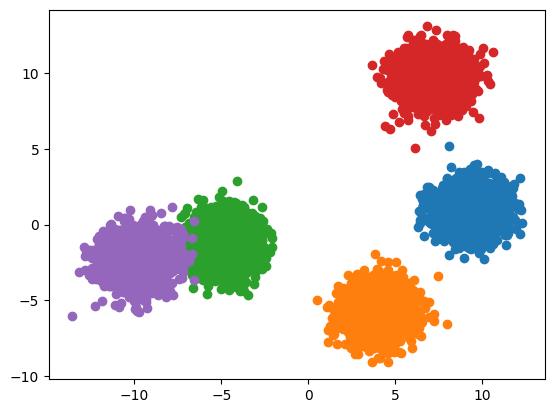

In [83]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.scatter(X[y==3,0],X[y==3,1])
plt.scatter(X[y==4,0],X[y==4,1])

### Difference between fit, fit_predict and predict

In [135]:
# Difference between fit, fit_predict and predict
KM_n=KMeans(n_clusters=5)

In [136]:
#fit()- fit the model to the data and generate labels for training data. Once the model is build, need to use predict() for new data points
KM_n.fit(X)
# creating a new data point
X_new2=([[1,2,3,4]])
KM_n.predict(X_new2)


array([3], dtype=int32)

In [137]:
X_new = ([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [1, 2, 3, 2], [5, 1, 2, 4]])
KM_n.fit_predict(X_new)

array([0, 1, 2, 4, 3], dtype=int32)

In [138]:
#Checking if both predict() and fit_predict() are giving same results. It gives same results as with fit_presict() it uses same parameters/centroids from original data and does prediction 
# for the new data point 
KM_n.predict(X_new)

array([0, 1, 2, 4, 3], dtype=int32)

# Clustering algorithm